In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sta

In [2]:
base = pd.read_csv('mt_cars.csv')

In [3]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#excluindo coluna
base = base.drop(['Unnamed: 0'], axis= 1)

In [5]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
#fazendo correlção entre consumo(mpg) e polegadas(disp)
X = base.iloc[:, 2]
y = base.iloc[:, 0]


In [7]:
#fazendo coeficiente de correlação
corelacao = np.corrcoef(X, y)
print(corelacao)

[[ 1.         -0.84755138]
 [-0.84755138  1.        ]]


In [11]:
X = X.values.reshape(-1, 1)



In [12]:
modelo = LinearRegression()


In [13]:
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#interceptação
modelo.intercept_

29.599854756163946

In [15]:
#inclinação
modelo.coef_

array([-0.04121512])

In [16]:
#visular o R2
#indica quanto as variáveis independentes explica as variáveis dependentes
modelo.score(X, y)

0.7183433404897299

In [29]:
#pip3 install --upgrade --no-deps statsmodels 


In [25]:
import statsmodels.formula.api as sm


In [26]:
#visular o R2 ajustado
#mpg é o atributo que queremos fazer a predição
#disp atributo independente (previsor)

previsoes = modelo.predict(X)
modelo_ajustado = sm.ols(formula= 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()



In [30]:
#olhar o dado Adj. R-squared que explica a relação das variáveis
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           9.38e-10
Time:                        21:38:43   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

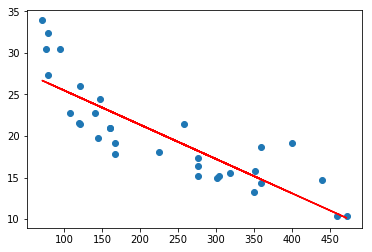

In [33]:
#temos correlação forte negativa
plt.scatter(X, y)
plt.plot(X, previsoes, color='red')

In [38]:
#fazendo uma previsão, passando polegadas
prev = [200]

modelo.predict([prev])

array([21.35683076])

In [39]:
X1 = base.iloc[:, 1:4].values

In [49]:
y1 = base.iloc[:, 0].values

In [52]:
modelo2 = LinearRegression()
modelo2.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#r2
modelo2.score(X1, y1)

0.7678877440928638

In [56]:
#r2 ajustado

modelo_ajustado2 = sm.ols(formula= 'mpg ~ cyl + disp + hp', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           5.05e-09
Time:                        21:57:51   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#criando uma nova previsão
novo = np.array([4, 200, 100])

In [58]:
novo = novo.reshape(1 , -1)

In [59]:
novo

array([[  4, 200, 100]])

In [60]:
modelo2.predict(novo)

array([24.03968887])